# ISTA 322 Homework 1

Welcome to your first homework!  This one is focused on just practicing some of the exercises covered in the last coding lesson.  There are also some more open-ended questions with elements that I didn't demonstrate in that lesson... they're structurally similar, but you might need to google a thing or two to figure out the correction function.  

You need to add your own code blocks to answer any of the coding questions.  Also, at the end of some sections I have a 'questions' section.  Add a text cell right below and enter your answers. 

## Loading and Importing

First thing you need to do is load up your packages and then bring in the data.  

This dataset contains daily values for Amazon's stock.  This includes opening, closing, high price, low price, and also the amount of stock traded. 

In [ ]:
import pandas as pd
# also import matplotlib.pyplot and numpy with the proper aliases
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
# Bring in your data. You just need to run this cell.
price = pd.read_csv("https://docs.google.com/spreadsheets/d/1z6br9DCz3v9MmPSBfGm7zy9-B-JQuKk71uh9SM0-NPw/gviz/tq?tqx=out:csv")

## Exploring the whole dataset

Now make some code cells to explore the whole dataset.  I want you to do the following:

- Get the number of rows and columns
- Get the datatypes of each column
- Look at the first five rows
- Look at the last five rows
- Look at summary statistics

In [ ]:
print(price.shape)
# 5852 rows x 7 columns

(5852, 7)


In [ ]:
print(price.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [ ]:
print(price.head(5))

         Date      Open      High       Low     Close  Adj Close    Volume
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200


In [ ]:
print(price.tail(5))

            Date         Open         High  ...        Close    Adj Close   Volume
5847  2020-08-10  3170.310059  3172.510010  ...  3148.159912  3148.159912  3167300
5848  2020-08-11  3113.199951  3159.219971  ...  3080.669922  3080.669922  3718100
5849  2020-08-12  3108.000000  3174.389893  ...  3162.239990  3162.239990  3527200
5850  2020-08-13  3182.989990  3217.520020  ...  3161.020020  3161.020020  3149000
5851  2020-08-14  3178.179932  3178.239990  ...  3148.020020  3148.020020  2749200

[5 rows x 7 columns]


In [ ]:
print(price.describe())

              Open         High  ...    Adj Close        Volume
count  5852.000000  5852.000000  ...  5852.000000  5.852000e+03
mean    377.469557   381.737827  ...   377.500736  7.512673e+06
std     596.291033   602.615299  ...   596.287464  7.278144e+06
min       1.406250     1.447917  ...     1.395833  4.872000e+05
25%      37.995000    38.590000  ...    37.950001  3.681975e+06
50%      83.699997    85.029999  ...    83.602501  5.652850e+06
75%     360.852501   365.794991  ...   362.217506  8.517450e+06
max    3251.060059  3344.290039  ...  3225.000000  1.043292e+08

[8 rows x 6 columns]


### Questions

- How many rows are in this dataset?
- Do any datatypes need to be converted?
- What was the mean and all time high opening stock price?

There are 5852 rows in this dataset.
Yes, the date needs to be converted into a datetime object.
The mean opening price was 377.47 dollars and the all time high opening price was 3251.06 dollars.

## Making some columns

Here we need to make a couple new columns.

- First, turn that date column into an actual date object.  
- Also make a new column called 'up_binom' if the stock price increased for that day

In [ ]:
price['Date'] = pd.to_datetime(price['Date'])

In [ ]:
price['up_binom'] = np.where(price['Close'] >= price['Open'], 1, 0)

### Using the columns - Making a plot

Let's use those columns we just made to make a plot

- First, explore your new column.  What is the starting date, ending date, and total time from beginning to end?  You'll need three lines of code to do this
- Next, make a plot of the closing price over the whole timeframe of the dataset
- Hint - you might need to google how to make a line plot!

In [ ]:
start = price['Date'].min()
end = price['Date'].max()
total = price['Date'].max() - price['Date'].min()

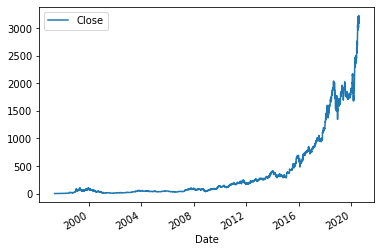

In [ ]:
price.plot.line('Date', 'Close')

### Using the columns - How rich could I be?  

Word problem time.  When I was 13 I save up $2000 from mowing lawns and bought a bicycle.  This was honestly right around the start of this dataset (May 15, 1997).  Let's say instead of buying that bike I put all that money into Amazon stock.  How much would that stock be worth on the very last day of this dataset?





In [ ]:
# I'm going to make your life easier and set the date column you created as the index.
# This will make searching and extracting the values much easier
price = price.set_index('Date')

In [ ]:
# Assuming we are following buy low sell high stock mechanics...
stock_amt = 2000 / price['Low'][0]
end_value = stock_amt * price['High'][5851]
print("Stock worth: %.2f" % end_value)


Stock worth: 3298498.29


###Questions

How big of a mistake did I make in dollars by not buying Amazon stock?

A mistake of about $3298498.29 give or take the value of your bike now. 

## JSON

The last part of the assignment will have you working with some basic JSON data.  The URL links to a JSON file with stats on every episode of the TV show Silicon Valley


In [ ]:
# First just run this to import the data
import requests
url = 'http://api.tvmaze.com/singlesearch/shows?q=silicon-valley&embed=episodes'
sv_json_obj = requests.get(url)
sv_json = sv_json_obj.json()

### Viewing your JSON

Now just to look at what's in the JSON a bit

- Make a code cell that just calls the JSON we named above. 
- Also run the .keys() function on the object.

In [ ]:
sv_json

In [ ]:
sv_json.keys()

dict_keys(['id', 'url', 'name', 'type', 'language', 'genres', 'status', 'runtime', 'premiered', 'officialSite', 'schedule', 'rating', 'weight', 'network', 'webChannel', 'externals', 'image', 'summary', 'updated', '_links', '_embedded'])

### Questions

Based on these responses, what keys are present in the JSON.  More importantly, are there any keys that don't get returned by .keys()?

Airdate, airstamp, airtime, number and a few others.

### Looking at overall show info

They keys it's returning are related to the overall show info.  Can you do the following? 

- Get the day the show premiered
- Get the summary of the show
- Get the name of the network the show aired on 

In [ ]:
print(sv_json['premiered'])
print(sv_json['summary'])
print(sv_json['network']['name'])

2014-04-06
<p>In the high-tech gold rush of modern Silicon Valley, the people most qualified to succeed are the least capable of handling success. From Mike Judge comes this satire about a programmer whose game-changing algorithm becomes the subject of a valley-wide bidding war.</p>
HBO


### Info from individual episodes

To wrap up I want you to pull just some info from individual episodes. To access them we can use the '_embedded' key first.  Please do the following

- Get the title of the 7th episode entry from the start
- Get the summary of the 3rd episode entry from the start
- Get the original image URL from the 4 entry from the start

In [ ]:
# First, you can see the structure after moving down a level into '_embedded'
sv_json['_embedded']

In [ ]:
print(sv_json['_embedded']['episodes'][6]['name'])
print(sv_json['_embedded']['episodes'][2]['summary'])
print(sv_json['_embedded']['episodes'][3]['image']['original'])

Proof of Concept
<p>While Gavin Belson begins to hype Nucleus, a competing compression platform, Richard learns that the name Pied Piper is already registered to a sprinkler company, forcing him to negotiate. Meanwhile, Erlich goes on a vision quest for a new company name, and Peter Gregory proves elusive when one of his companies asks for money.</p>
http://static.tvmaze.com/uploads/images/original_untouched/49/123636.jpg


## Making functions

The last part of this homework is to make a function based on the Amazon stock price dataset. I want this function to calculate the amount of money you would have made based on an initial investment at a date you enter and is extracted at a date you enter.  So the three arguments should be `starting_investment, investment_date, and cash_out_date`.  The return should be the number of dollars made based on that (not the total amount including the initial investment). Call the function `if_i_only_knew`.

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
price = pd.read_csv("https://docs.google.com/spreadsheets/d/1z6br9DCz3v9MmPSBfGm7zy9-B-JQuKk71uh9SM0-NPw/gviz/tq?tqx=out:csv")
# make your function here
def find_row(date):
  # Didn't know how to return row number of given date, so I made a function for it.
  for i in range(len(price["Date"])-1):
    if price["Date"][i] == date:
      return i
def if_i_only_knew(starting_investment, investment_date, cash_out_date):
  start_price = price['Close'][find_row(investment_date)]
  start_stock_amt = starting_investment / start_price
  end_price = price['Close'][find_row(cash_out_date)]
  dollars_made = round((start_stock_amt * end_price - starting_investment), 2)
  return dollars_made

In [198]:
# test your function here
# You should get 1082660 if you invested 5000 on 1997-05-15 and cashed out on 2105-05-15
# I'm guessing 2105 means 2015
if_i_only_knew(5000, "1997-05-15", "2015-05-15")

1082659.76